In [1]:
from PINN.PhysicsInformedROPDF import *
# Testing
import matplotlib.pyplot as plt
import torch
import numpy as np
import scipy

# set random seeds
np.random.seed(10)
torch.manual_seed(10);

In [2]:
data_path = "../data/LinearOscillator/OU_Noise_Energy_PINN_Data.mat"
# create PINN
pinn = PhysicsInformedROPDF(indim=2, outdim=1, data_path=data_path)

In [3]:
# only physics loss is used
# testing training
train(
    pinn, pinn.optimizer, 
    None, batch_size=1000,
    epochs=50, mode="physics_only", batch_print=50
)

------------------------------------------------------------------

|                      Epoch 1                                  |

------------------------------------------------------------------

| => | Batch 1 |

| => | Batch 51 |

------------------------------------------------------------------

|        Epoch 1, Batch Average Loss = 14362444286.056004                       |

------------------------------------------------------------------

                     P Loss             = 0.9251346649851673
                     |    domain        = 0.9251346649851673
                     D Loss             = 0.0
                     R Loss             = 14362444285.130869
------------------------------------------------------------------

|                      Epoch 2                                  |

------------------------------------------------------------------

| => | Batch 1 |

| => | Batch 51 |

------------------------------------------------------------------

|   

| => | Batch 51 |

------------------------------------------------------------------

|        Epoch 13, Batch Average Loss = 1009.0262191444125                       |

------------------------------------------------------------------

                     P Loss             = 5.053797320654022e-06
                     |    domain        = 5.053797320654022e-06
                     D Loss             = 0.0
                     R Loss             = 1009.0262140906149
------------------------------------------------------------------

|                      Epoch 14                                  |

------------------------------------------------------------------

| => | Batch 1 |

| => | Batch 51 |

------------------------------------------------------------------

|        Epoch 14, Batch Average Loss = 1001.9661503833418                       |

------------------------------------------------------------------

                     P Loss             = 4.941519595622561e-06
 

| => | Batch 51 |

------------------------------------------------------------------

|        Epoch 25, Batch Average Loss = 1182.19973201058                       |

------------------------------------------------------------------

                     P Loss             = 3.4158863137699436e-06
                     |    domain        = 3.4158863137699436e-06
                     D Loss             = 0.0
                     R Loss             = 1182.1997285946936
------------------------------------------------------------------

|                      Epoch 26                                  |

------------------------------------------------------------------

| => | Batch 1 |

| => | Batch 51 |

------------------------------------------------------------------

|        Epoch 26, Batch Average Loss = 1500.7763285835372                       |

------------------------------------------------------------------

                     P Loss             = 3.2671975138777756e-06


| => | Batch 51 |

------------------------------------------------------------------

|        Epoch 37, Batch Average Loss = 1031666.7694036965                       |

------------------------------------------------------------------

                     P Loss             = 2.1210652412699925e-06
                     |    domain        = 2.1210652412699925e-06
                     D Loss             = 0.0
                     R Loss             = 1031666.7694015754
------------------------------------------------------------------

|                      Epoch 38                                  |

------------------------------------------------------------------

| => | Batch 1 |

| => | Batch 51 |

------------------------------------------------------------------

|        Epoch 38, Batch Average Loss = 2469573.0851884955                       |

------------------------------------------------------------------

                     P Loss             = 1.0887870092272804e-0

| => | Batch 51 |

------------------------------------------------------------------

|        Epoch 49, Batch Average Loss = 4515170.677884514                       |

------------------------------------------------------------------

                     P Loss             = 6.462695351795276e-07
                     |    domain        = 6.462695351795276e-07
                     D Loss             = 0.0
                     R Loss             = 4515170.677883868
------------------------------------------------------------------

|                      Epoch 50                                  |

------------------------------------------------------------------

| => | Batch 1 |

| => | Batch 51 |

------------------------------------------------------------------

|        Epoch 50, Batch Average Loss = 119.08218845502462                       |

------------------------------------------------------------------

                     P Loss             = 3.299174843788638e-08
   

{'pde_loss': [0.9251346649851673,
  3.0804680265592695e-05,
  3.0061345018830477e-05,
  2.9750887510812226e-05,
  2.9363072517467075e-05,
  2.8882339761497757e-05,
  2.8043250888505394e-05,
  7.571009234566449e-06,
  5.466382448796445e-06,
  5.3247029838396125e-06,
  5.277522233041393e-06,
  5.163285424424653e-06,
  5.053797320654022e-06,
  4.941519595622561e-06,
  4.818141734831828e-06,
  4.685173371737017e-06,
  4.5538282111192685e-06,
  4.421236330461563e-06,
  4.281615709520573e-06,
  4.1388250632305616e-06,
  3.999366482154221e-06,
  3.852167729369222e-06,
  3.709484651690216e-06,
  3.5624393959406308e-06,
  3.4158863137699436e-06,
  3.2671975138777756e-06,
  3.1203097909522575e-06,
  2.9718798294597554e-06,
  2.8304256098600125e-06,
  2.6891477508624223e-06,
  2.5493795009638776e-06,
  2.421674868403621e-06,
  2.5057087526799434e-06,
  2.4899581930067705e-06,
  2.402235456246816e-06,
  2.1520396716359095e-06,
  2.1210652412699925e-06,
  1.0887870092272804e-06,
  3.958520512828458

In [4]:
query = cartesian_data(pinn.tgrid, pinn.xgrid)

D_pred = pinn.D_nn(query).reshape(pinn.nx, pinn.nt).T.detach().numpy()
G_pred = pinn.G_nn(query).reshape(pinn.nx, pinn.nt).T.detach().numpy()
p_pred = pinn(query).reshape(pinn.nx, pinn.nt).T.detach().numpy()

# grids
tgrid = pinn.tgrid.detach().numpy()
xgrid = pinn.xgrid.detach().numpy()

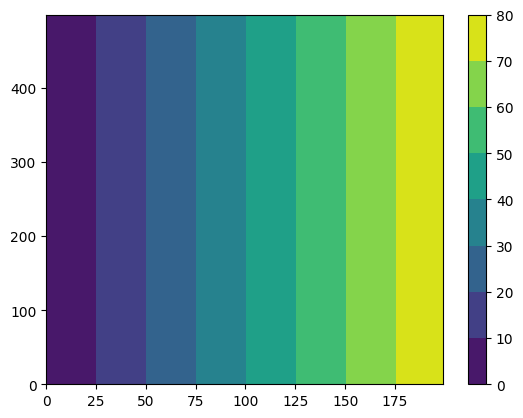

In [5]:
plt.contourf(D_pred); plt.colorbar();

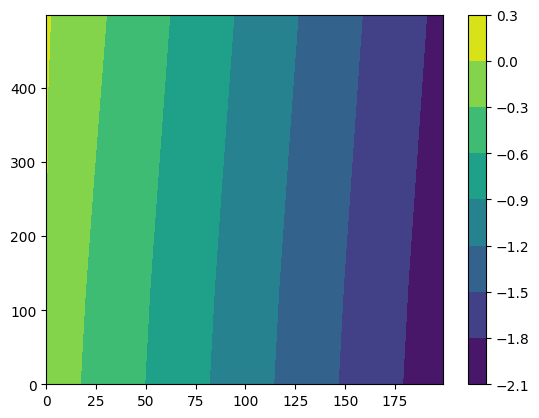

In [6]:
plt.contourf(G_pred); plt.colorbar();

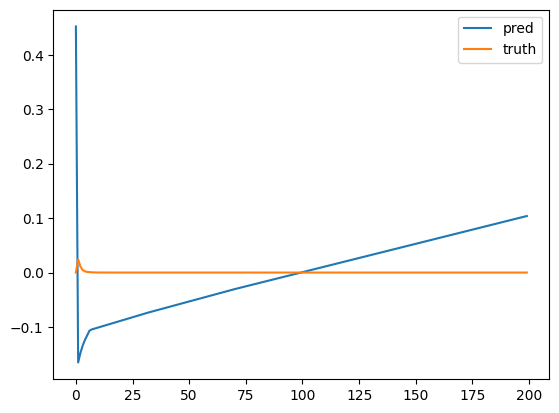

In [10]:
idx = 499
p_exact = pinn.raw_data["pmc"]

plt.plot(p_pred[idx, :], label="pred")
plt.plot(p_exact[idx, :], label="truth")
plt.legend()